In [1]:
import tensorflow as tf
import cv2
import os 
import matplotlib.pyplot as plt
import numpy as np


In [5]:
img_array=cv2.imread("dataSet/Training/0/Training_3908.jpg")


In [6]:
img_array.shape
#so it has 3 channel since its rgb

(48, 48, 3)

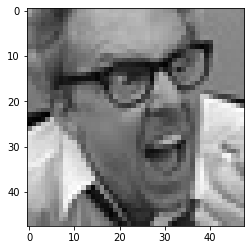

In [7]:
plt.imshow(img_array)

In [8]:
dataDirectory="dataSet/Training/" ##Training dataset

In [9]:
Classes=["0","1","2","3","4","5","6"] ##List of Classes
TargetClasses={"0":"angry",
 "1":"disgust",
 "2":"fear",
 "3":"happy",
 "4":"neutral",
 "5":"sad",
 "6":"surprise"}

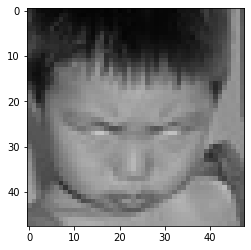

In [10]:
for category in Classes:
    path=os.path.join(dataDirectory,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

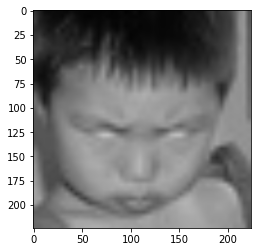

In [11]:
img_size=224
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()

In [13]:
new_array.shape ##  since iam using transfer learning so for transfer learning if i want to use any deepleaning classifiyer it use 224x224 images

(224, 224, 3)

In [14]:
training_Data=[] ## data array

def create_training_Data():
    for category in Classes:
        path=os.path.join(dataDirectory,category)
        class_num=Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass
           

In [15]:
create_training_Data()

In [17]:
import random
random.shuffle(training_Data)
training_Data=training_Data[0:5000]

In [18]:
X = [] ## data/feature
y = [] ## label

for features,label in training_Data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1,img_size,img_size,3) ## converting it to 4 dimension 
## actually for mobile net since using deeplearning architechture such as mobile net which takes in 4 dimensional because it also contains depth wise convolutional neural network

In [19]:
print(X.shape)


(5000, 224, 224, 3)


In [20]:
#normalize the data
X = X/255 ## normalizing the data here

In [21]:
Y = np.array(y)

In [22]:
Y.shape

(5000,)

# Deep Learning model for training - Transfer Learning

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [24]:
model = tf.keras.applications.MobileNetV2() #Pre-trained Model

In [25]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

## Model: mobilenetv2_1.00_224
## Total params: 3,538,984
## Trainable params: 3,504,872
## Non-trainable params: 34,112
## Prediction Classes : 1000


# Transfer Learning - Tuning , weights will start from last check point

In [26]:
base_input=model.layers[0].input ## input

In [27]:
base_output=model.layers[-2].output #-2 and not -1 because i jst need the output of the base output

In [28]:
base_output

<tf.Tensor 'global_average_pooling2d/Mean:0' shape=(None, 1280) dtype=float32>

In [29]:
final_output=layers.Dense(128)(base_output) ## adding new layer after the ouput of global pooling layer
final_output= layers.Activation('relu')(final_output) ## activation function
final_output=layers.Dense(64)(final_output)
final_output= layers.Activation('relu')(final_output) ## activation function
final_output=layers.Dense(7,activation='softmax')(final_output) ## since my classes are 7 and this is classification layer 



In [30]:
base_output

<tf.Tensor 'global_average_pooling2d/Mean:0' shape=(None, 1280) dtype=float32>

In [31]:
final_output

<tf.Tensor 'dense_2/Softmax:0' shape=(None, 7) dtype=float32>

In [32]:
new_model=keras.Model(inputs=base_input,outputs=final_output)

In [33]:
new_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________________

In [34]:
new_model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [35]:
new_model.fit(X,Y,epochs=5)

Epoch 1/5
157/157 [==============================] - 554s 4s/step - loss: 1.4894 - accuracy: 0.4344
Epoch 2/5
157/157 [==============================] - 540s 3s/step - loss: 1.2187 - accuracy: 0.5490
Epoch 3/5
157/157 [==============================] - 547s 3s/step - loss: 1.1087 - accuracy: 0.5932
Epoch 4/5
157/157 [==============================] - 557s 4s/step - loss: 1.0103 - accuracy: 0.6248
Epoch 5/5
157/157 [==============================] - 525s 3s/step - loss: 0.9433 - accuracy: 0.6494


In [36]:
new_model.save('my_model_1.h5')

In [ ]:
# new_model.fit(X,Y,epochs=15)

In [2]:
new_model=tf.keras.models.load_model('my_model_1.h5')

In [ ]:
new_model.evaluate  ## test data, i will not use test ,deploy live image        

In [ ]:
#Using already trained weights for face detection algorithms
# basically it works only on grey images so we need to convert rgb to grey images

In [184]:
frame = cv2.imread("angry.jpg")

In [185]:
frame.shape

(270, 360, 3)

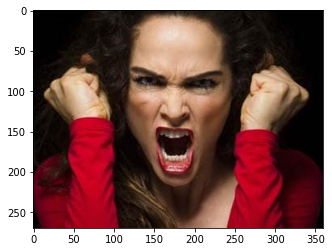

In [186]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

## we need face detection here to crop just to the face

# we use harcasacde which have already trained weights for the face detection

In [187]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

In [188]:
gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

In [189]:
gray.shape

(270, 360)

In [190]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray=gray[y:y+h, x:x+w] 
    roi_color= frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2) 
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else:
        for (ex, ey, ew, eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex + ew]
        # break

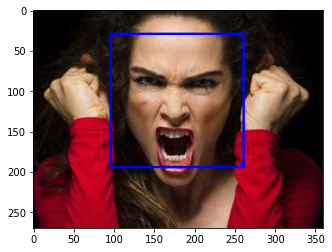

In [191]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

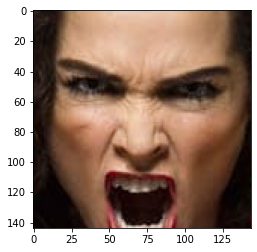

In [192]:
plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))

In [193]:
final_image=cv2.resize(face_roi,(224,224)) ## resizing
final_image=np.expand_dims(final_image,axis=0) ## adding forth dimension
final_image=final_image/255.0 ## normalizing it

In [194]:
predictions=new_model.predict(final_image)

In [195]:
predictions[0]

array([2.2412024e-01, 1.7233814e-08, 5.1506843e-02, 2.2549184e-02,
       6.0074860e-01, 4.8911874e-04, 1.0058597e-01], dtype=float32)

In [196]:
np.argmax(predictions)

4

In [241]:
import cv2 ### pip install opencv-python
#from deepface import DeepFace ## pip install deepface 
path = "haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

# set the rectangle background to white
rectangle_bgr = (255, 255, 255) #make a black image
img = np.zeros((500, 500))
# set some text
text = "Some text in a box!"
# get the width and height of the text box
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]
# set the text start position
text_offset_x = 10
text_offset_y=img.shape[0] - 25
# make the coords of the box with a small padding of two pixels
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y- text_height - 2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED) 
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)
cap= cv2.VideoCapture (0)
# Check if the webcam is opened correctly

if not cap.isOpened():
    cap=cv2.VideoCapture (0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces=faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray =gray[y:y+h, x:x+w]
        roi_color= frame [y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0: 
            print("Face not detected")
        else:
            for (ex, ey, ew, eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex: ex + ew] ## cropping the face

    final_image = cv2.resize(face_roi, (224, 224))
    final_image = np.expand_dims(final_image, axis=0)
    final_image=final_image/255.0
    font = cv2.FONT_HERSHEY_SIMPLEX
    Predictions = new_model.predict (final_image)
    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN

    if (np.argmax(Predictions) == 0):
        status = "Angry"
        x1, y1,w1, h1 = 0,0,175,75
        # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1+ w1, y1 + h1), (0,0,0), -1)
        # Add text
        cv2.putText(frame, status, (x1 + int (w1/10),y1 + int (h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
    elif (np.argmax(Predictions) == 1):
        status = "Disgust"
        x1, y1,w1,h1 = 0,0,175,75
        # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1+ w1, y1+ h1), (0,0,0), -1)
        # Add text
        cv2.putText(frame, status, (x1 + int (w1/10), y1 + int (h1/2)),cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255),2)
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2,cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))

    elif (np.argmax (Predictions) == 2):
        status = "Fear"
        x1, y1,w1,h1 = 0,0,175,75
        # Draw black background rectangle 
        cv2.rectangle(frame, (x1, x1), (x1+ wl, y1 + h1), (0,0,0), -1)
        # Add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1+ int (h1/2)), cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255),1)

    elif (np.argmax (Predictions) == 3):
        status = "Happy"
        x1, y1,w1, h1 = 0,0,175,75 # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1+ w1, y1+ h1), (0,0,0), -1)
        # Add text
        cv2.putText(frame, status, (x1+ int(w1/10), y1+ int (h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255),2)
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
    
    elif (np.argmax (Predictions) == 4): 
        status = "Neutral"
        x1, y1,w1,h1 = 0,0,175,75 # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1+ w1, y1 + h1), (0,0,0), -1)
        # Add text
        cv2.putText(frame, status, (x1 + int (w1/10), y1 + int (h1/2)), cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))

    elif (np.argmax (Predictions) == 5):
        status = "Sad"
        x1, y1,w1, h1 = 0,0,175,75
        # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1+ w1, y1 + h1), (0,0,0), -1)
        # Add text
        cv2.putText(frame, status, (x1+ int (w1/10), y1+ int (h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,0,255),2)
        cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))
    else:
        status = "Suprise"
        x1, y1,w1,h1 = 0,0,175,75 # Draw black background rectangle
        cv2.rectangle (frame, (x1, x1), (x1+ w1, y1+h1), (0,0,0), -1)
        # Add text
        cv2.putText(frame, status, (x1 + int (w1/10), y1 + int (h1/2)), cv2.FONT_HERSHEY_SIMPLEX,0.7, (0,255,0), 2) 
        cv2.putText(frame, status, (100, 150), font, 3, (0, 255,0),2, cv2.LINE_4)     
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255,0))
    
    cv2.imshow('Face Emotion Recognition',frame)
    if(cv2.waitKey(2) & 0xFF ==ord('q')):
        break
cap.release()
cv2.destroyAllWindows()


Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
